## MODEL Building (Under sampling dataset)

In [144]:
#importing modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,  auc

import warnings
warnings.filterwarnings('ignore')

In [145]:
#importing under sampling dataset
trai_df = pd.read_csv(Path('Resources/cleaned-data/2019loans_us.csv'))
tes_df = pd.read_csv(Path('Resources/cleaned-data/2020Q1loans_us.csv'))

In [149]:
trai_df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'home_ownership',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'm

In [154]:
#shape of training data
train_df=trai_df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status']]
test_df=tes_df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status']]

In [155]:
#shape of test data
test_df.shape

(4702, 5)

In [156]:
#train_df.info()

#removing unnessary columns from training and testing set
train_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [157]:
train_df['loan_status'].value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

## Train and test set

In [158]:
# create feature matrix (X) #selecting all columns except 'loan_status'
X_train=train_df.drop('loan_status', axis=1) 
X_test=test_df.drop('loan_status', axis=1) 

# create response vector (y) ##selecting 'loan_status'
y_train=train_df['loan_status'].values  
y_test=test_df['loan_status'].values  

In [159]:
y_train

array(['low_risk', 'low_risk', 'low_risk', ..., 'high_risk', 'high_risk',
       'high_risk'], dtype=object)

## Converting categorical data to numeric

In [163]:
# Convert categorical data to numeric
X_train_dumy=pd.get_dummies(X_train)
X_test_dumy=pd.get_dummies(X_test)

In [164]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(12180, 4)
(4702, 4)


In [165]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(12180, 4)
(4702, 4)


In [166]:
#train_list=X_train_dumy.values.tolist()
#test_list=X_test_dumy.values.tolist()


## Scaling using StandardScalar

In [167]:
 # Converting output labels to 0 and 1
y_train_label = LabelEncoder().fit_transform(y_train)
y_train=y_train_label
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [168]:
 # Converting output labels to 0 and 1
y_test_label = LabelEncoder().fit_transform(y_test)
y_test=y_test_label

In [169]:
# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_dumy)


In [170]:
# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train_dumy)
X_test_scaled = X_scaler.transform(X_test_dumy)


In [171]:
#shape of test and train after standard scalar
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(12180, 4)
(4702, 4)


## LogisticRegression

In [172]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [173]:
#printing the accuracy score
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.6138752052545156
Testing Score: 0.6303700552956188


In [174]:
#score of training set using cross_val_score
cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.60344828, 0.61740558, 0.61330049, 0.62972085, 0.61247947])

In [175]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(lr, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[3472, 2618],
       [2068, 4022]])

In [176]:
#predection on the test set and confusion matrix
y_pred=lr.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[1457,  894],
       [ 844, 1507]])

In [177]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      2351
           1       0.63      0.64      0.63      2351

    accuracy                           0.63      4702
   macro avg       0.63      0.63      0.63      4702
weighted avg       0.63      0.63      0.63      4702



In [178]:
#roc curve
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_lr)

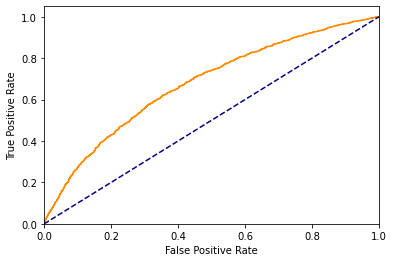

In [179]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [180]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.6759432124867543

## KNeighbors Classifier

In [181]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [182]:
#printing the accuracy score
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

Training Score: 0.7701970443349754
Testing Score: 0.568481497235219


In [183]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 0.975/0.556
k: 3, Train/Test Score: 0.770/0.568
k: 5, Train/Test Score: 0.712/0.585
k: 7, Train/Test Score: 0.689/0.592
k: 9, Train/Test Score: 0.673/0.596
k: 11, Train/Test Score: 0.665/0.602
k: 13, Train/Test Score: 0.657/0.609
k: 15, Train/Test Score: 0.654/0.606
k: 17, Train/Test Score: 0.649/0.611
k: 19, Train/Test Score: 0.644/0.614


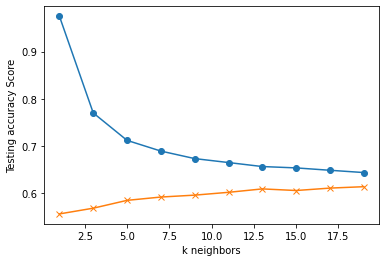

In [184]:
#plotting knn scores
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [185]:
 # Note that k: 7 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.595


In [186]:
#score of training set using cross_val_score
cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.55952381, 0.56034483, 0.56075534, 0.58087028, 0.57512315])

In [187]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(knn, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[4068, 2022],
       [3248, 2842]])

In [188]:
#predection on the test set and confusion matrix
y_pred_knn=lr.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_knn)

array([[1457,  894],
       [ 844, 1507]])

In [189]:
#classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      2351
           1       0.63      0.64      0.63      2351

    accuracy                           0.63      4702
   macro avg       0.63      0.63      0.63      4702
weighted avg       0.63      0.63      0.63      4702



In [190]:
#roc curve
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_pred_proba)

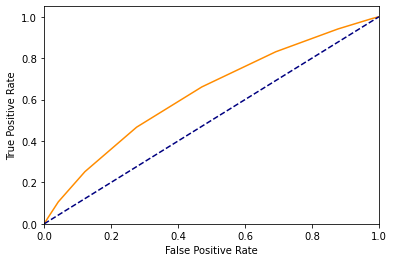

In [191]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [192]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.6300236774454194

## Support Vector Classifier

In [193]:
# Support vector machine linear classifier
svc=SVC(kernel='linear', probability=True)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [194]:
#printing the accuracy score
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

Training Score: 0.6106732348111659
Testing Score: 0.6282433007230965


In [195]:
#predection on the test set and confusion matrix
y_pred_svc=svc.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_svc)

array([[1424,  927],
       [ 821, 1530]])

In [196]:
#classification report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2351
           1       0.62      0.65      0.64      2351

    accuracy                           0.63      4702
   macro avg       0.63      0.63      0.63      4702
weighted avg       0.63      0.63      0.63      4702



In [197]:
#roc curve
y_proba_svc = svc.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_svc)

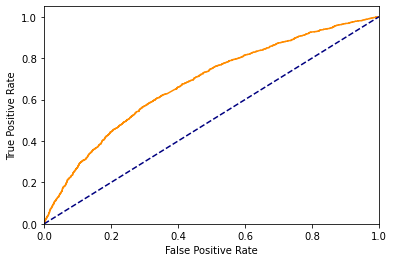

In [198]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [199]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.6786366191495479

### Tuning hyperparamaters  using Grid Search CV

In [200]:
#### Using GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.005]}
grid_svc = GridSearchCV(svc, param_grid, cv=3, verbose=1, n_jobs=-1)

In [201]:
grid_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(kernel='linear', probability=True), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.005]},
             verbose=1)

In [202]:
# List the best parameters for this dataset
print(grid_svc.best_params_)

{'C': 5, 'gamma': 0.0001}


In [203]:
# List the best score
print(grid_svc.best_score_)

0.6111658456486043


In [204]:
#best estimator
svc_b=grid_svc.best_estimator_
svc_b

SVC(C=5, gamma=0.0001, kernel='linear', probability=True)

In [205]:
# Score the hypertuned model on the test dataset
svc_b.score(X_test_scaled, y_test)

0.6282433007230965

In [206]:
# Make predictions with the hypertuned model
pred = svc_b.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[1424,  927],
       [ 821, 1530]])

In [207]:
#classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2351
           1       0.62      0.65      0.64      2351

    accuracy                           0.63      4702
   macro avg       0.63      0.63      0.63      4702
weighted avg       0.63      0.63      0.63      4702



### Tuning hyperparamaters  using Randomized Search CV

In [208]:
#### Using RandomizedSearchCV
param_rand = {
    'C' : np.arange(0, 100, 1),
    'gamma': np.arange(0, 0.01, .0001),
}
rand_svc = RandomizedSearchCV(svc, param_rand, cv=3, n_iter=100, random_state=1, verbose=1, n_jobs=-1)

In [ ]:
rand_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# List the best parameters for this dataset
print(rand_svc.best_params_)

In [ ]:
# List the best score
print(rand_svc.best_score_)

In [ ]:
#best estimator
svc_best=rand_svc.best_estimator_
svc_best

In [ ]:
# Score the hypertuned model on the test dataset
svc_best.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
predic = svc_best.predict(X_test_scaled)
confusion_matrix(y_test, predic)

In [ ]:
#classification report
print(classification_report(y_test, predic))

## Decision Tree 

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_dt=dt.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_dt)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_dt))

In [ ]:
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

In [ ]:
#roc curve
y_proba_tree = dt.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_tree)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

### Tuning hyperparamaters  using Grid Search CV for Decision Tree

In [ ]:
#### Using GridSearchCV
param_grid_dt = {
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, verbose=1, n_jobs=-1)

In [ ]:
grid_dt.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_dt.best_params_)

In [ ]:
# List the best score
print(grid_dt.best_score_)

In [ ]:
#best estimator
dt_b=grid_dt.best_estimator_
dt_b

In [ ]:
# Score the hypertuned model on the test dataset
dt_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_dt = dt_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_dt)

In [ ]:
#classification report
print(classification_report(y_test, pred_dt))

### Tuning hyperparamaters  using Randomized Search CV for Decision Tree

In [ ]:
#### Using GridSearchCV
param_rand_dt ={
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_dt = RandomizedSearchCV(dt, param_rand_dt, cv=3, verbose=4, n_jobs=-1)

In [ ]:
rand_dt.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(rand_dt.best_params_)

In [ ]:
# List the best score
print(rand_dt.best_score_)

In [ ]:
#best estimator
dt_R_b=rand_dt.best_estimator_
dt_R_b

In [ ]:
# Score the hypertuned model on the test dataset
dt_R_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_dtr = dt_R_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_dtr)

In [ ]:
#classification report
print(classification_report(y_test, pred_dtr))

## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [ ]:
#Random Forest classifier model
rf=RandomForestClassifier(random_state=1, n_estimators=500)
rf.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

In [ ]:
#score of training set using cross_val_score
cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [ ]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(rf, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

In [ ]:
#predection on the test set and confusion matrix
y_pred_rf=rf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_rf)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_rf))

In [ ]:
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

In [ ]:
#roc curve
y_proba_forest = rf.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_forest)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

### Tuning hyperparamaters  using Grid Search CV for Random Forest

In [ ]:
#### Using GridSearchCV
param_grid_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, verbose=1, n_jobs=-1)

In [ ]:
grid_rf.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_rf.best_params_)

In [ ]:
# List the best score
print(grid_rf.best_score_)

In [ ]:
#best estimator
rf_b=grid_rf.best_estimator_
rf_b

In [ ]:
# Score the hypertuned model on the test dataset
rf_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_rf = rf_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rf)

In [ ]:
#classification report
print(classification_report(y_test, pred_rf))

### Tuning hyperparamaters  using Randomized Search CV for Random Forest

In [ ]:
#### Using GridSearchCV
param_rand_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rf = RandomizedSearchCV(rf, param_rand_rf, cv=3, verbose=1, n_jobs=-1)

In [ ]:
rand_rf.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(rand_rf.best_params_)

In [ ]:
# List the best score
print(rand_rf.best_score_)

In [ ]:
#best estimator
rf_R_b=rand_rf.best_estimator_
rf_R_b

In [ ]:
# Score the hypertuned model on the test dataset
rf_R_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_rfr = rf_R_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rfr)

In [ ]:
#classification report
print(classification_report(y_test, pred_rfr))

## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [ ]:
et = ExtraTreesClassifier(random_state=1, n_estimators=500)
et.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {et.score(X_train_scaled, y_train)}')
print(f'Testing Score: {et.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_et=et.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_et)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_et))

In [ ]:
features_et = et.feature_importances_
print(features_et)
plt.bar(x = range(len(features_et)), height=features_et)
plt.show()

In [ ]:
#roc curve
y_proba_rand_tree = et.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_rand_tree)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

### Tuning hyperparamaters  using Grid Search CV for Extremely Random Tree

In [ ]:
#### Using GridSearchCV
param_grid_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rt = GridSearchCV(rt, param_grid_rt, cv=3, verbose=1, n_jobs=-1)

In [ ]:
grid_rt.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid_rt.best_params_)

In [ ]:
# List the best score
print(grid_rt.best_score_)

In [ ]:
#best estimator
rt_b=grid_rt.best_estimator_
rt_b

In [ ]:
# Score the hypertuned model on the test dataset
rt_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_rt = rt_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rt)

In [ ]:
#classification report
print(classification_report(y_test, pred_rt))

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [ ]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(et, param_rand_rt, cv=3, verbose=1, n_jobs=-1)

In [ ]:
rand_rt.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters for this dataset
print(rand_rt.best_params_)

In [ ]:
# List the best score
print(rand_rt.best_score_)

In [ ]:
#best estimator
rt_R_b=rand_rt.best_estimator_
rt_R_b

In [ ]:
# Score the hypertuned model on the test dataset
rt_R_b.score(X_test_scaled, y_test)

In [ ]:
# Make predictions with the hypertuned model
pred_rt_R = rt_R_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rt_R)

In [ ]:
#classification report
print(classification_report(y_test, pred_rt_R))

## Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [ ]:
ab = AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1)
ab.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {ab.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ab.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_ab=ab.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_ab)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_ab))

In [ ]:
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

In [ ]:
#roc curve
y_proba_ab = ab.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_ab)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

In [ ]:

def model_tester(model, X_train_scaled, X_test_scaled,y_train, y_test):
    clf = model.fit(X_train_scaled, y_train)
    y_pred=clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)

## Trying to improve score by selecting important features based on Adaboster Classifier


In [ ]:
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

In [ ]:
sel.get_support()

In [ ]:
X_train_sel=sel.transform(X_train_dumy)
X_test_sel=sel.transform(X_test_dumy)

scaler = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler.transform(X_train_sel)
X_selected_test_scaled = scaler.transform(X_test_sel)


### Logistic Regression after selecting important features

In [ ]:
lr_s = LogisticRegression()
lr_s.fit(X_selected_train_scaled, y_train)

In [ ]:
#before model selection
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

### KNeighborsClassifier after selecting important features

In [ ]:
knn_s=KNeighborsClassifier(n_neighbors=3)
knn_s.fit(X_selected_train_scaled, y_train)

In [ ]:
#before model selection
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
print(f'Training Score: {knn_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {knn_s.score(X_selected_test_scaled, y_test)}')

### SVC after electing important features

In [ ]:
# Support vector machine linear classifier
svc_s=SVC(kernel='linear')
svc_s.fit(X_selected_train_scaled, y_train)

In [ ]:
#before model selection
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

### Decision Tree after electing important features

In [ ]:
dt_s = DecisionTreeClassifier()
dt_s.fit(X_selected_train_scaled, y_train)

In [ ]:
#before model selection
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

## Real and predicted value using different model

In [ ]:
#Predected value
y_pred_lr=lr.predict(X_test_scaled)
y_pred_knn=knn.predict(X_test_scaled)
y_pred_svc=svc.predict(X_test_scaled)
y_pred_dt=dt_b.predict(X_test_scaled)
y_pred_rf=rf_R_b.predict(X_test_scaled)
y_pred_et=et.predict(X_test_scaled)
y_pred_ab=ab.predict(X_test_scaled)

In [ ]:
df_pred=pd.DataFrame({'loan risk':y_test,
                     'logistic Regression':y_pred_lr,
                     'knn':y_pred_lr,
                     'svc':y_pred_svc,
                     'Decision Tree':y_pred_dt,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_et,
                     'Ada Boost':y_pred_ab})
df_pred.replace({1:'Low Risk', 0: 'High Risk'}, inplace=True)
df_pred

In [ ]:
#before model selection
lr_train=lr.score(X_train_scaled, y_train)
lr_test=lr.score(X_test_scaled, y_test)
#after model selection
lr_s_train=lr_s.score(X_selected_train_scaled, y_train)
lr_s_test=lr_s.score(X_selected_test_scaled, y_test)

knn_train=knn.score(X_train_scaled, y_train)
knn_test=knn.score(X_test_scaled, y_test)
#after model selection
knn_s_train=knn_s.score(X_selected_train_scaled, y_train)
knn_s_test=knn_s.score(X_selected_test_scaled, y_test)

svc_train=svc.score(X_train_scaled, y_train)
svc_test=svc.score(X_test_scaled, y_test)
#after model selection
svc_s_train=svc_s.score(X_selected_train_scaled, y_train)
svc_s_test=svc_s.score(X_selected_test_scaled, y_test)

dt_train=dt.score(X_train_scaled, y_train)
dt_test=dt.score(X_test_scaled, y_test)
#after model selection
dt_s_train=dt_s.score(X_selected_train_scaled, y_train)
dt_s_test=dt_s.score(X_selected_test_scaled, y_test)

rf_train=rf.score(X_train_scaled, y_train)
rf_test=rf.score(X_test_scaled, y_test)
#after model selection
#rf_s_train=rf_s.score(X_selected_train_scaled, y_train)
#rf_s_test=rf_s.score(X_selected_test_scaled, y_test)

et_train=et.score(X_train_scaled, y_train)
et_test=et.score(X_test_scaled, y_test)
#after model selection
#et_s_train=et_s.score(X_selected_train_scaled, y_train)
#et_s_test=et_s.score(X_selected_test_scaled, y_test)

ab_train=ab.score(X_train_scaled, y_train)
ab_test=ab.score(X_test_scaled, y_test)
#after model selection
#ab_s_train=ab_s.score(X_selected_train_scaled, y_train)
#ab_s_test=ab_s.score(X_selected_test_scaled, y_test)

In [ ]:
#making dataframe on evaluation metrices
evaluation_df=pd.DataFrame({'logistic Reg':[lr_train,lr_test],
                           'knn':[knn_train,knn_test],
                            'svc':[svc_train,svc_test],
                            'Decision Tree':[dt_train,dt_test],
                           'Random Forest':[rf_train,rf_test],
                            'Extra Random Tree':[et_train,et_test],
                           'Ada Boost':[ab_train,ab_test]}
                           ,index=['train score','test score'])
evaluation_df

In [ ]:
#making dataframe on evaluation metrices
evaluation_df=pd.DataFrame({'logistic Reg':[lr_s_train,lr_s_test],
                           'knn':[knn_s_train,knn_s_test],
                            'svc':[svc_s_train,svc_s_test],
                            'Decision Tree':[dt_s_train,dt_s_test]}
                           ,index=['train score ','test score'])
evaluation_df

In [ ]:
#20 random sample
df_samp=df_pred.sample(20)
df_samp

In [ ]:
df_samp.iloc[0]


## Saving the model

In [ ]:
#Saving the model
import joblib
joblib.dump(lr, 'model.pkl')

In [ ]:
#Saving the standardscalar
import joblib
joblib.dump(X_scaler, 'scaler.pkl')

In [ ]:
#saving random other values for website
test_20=X_test_dumy.sample(20)
model_dumy=test_20.to_numpy()
model_dumy[6]

In [ ]:
test=X_test_scaled[2,:]

In [ ]:
model=joblib.load('model.pkl')
scl=joblib.load('scaler.pkl')

In [ ]:
a_test_scaled = X_scaler.transform(X_test_dumy)
a_test_scaled[1]

In [ ]:
X_test_dumy.to_numpy()

In [ ]:
sc = scl.transform(X_test_dumy)
sc[0]

In [ ]:
model.predict(a_test_scaled)

In [ ]:
#model.predict(sc)

In [ ]:
model.predict(sc)

In [ ]:
the_array.shape[1]

In [ ]:
X_test_dumy.sample(3).to_numpy()

In [ ]:
# import module
import random
import numpy as np
 
# create 2D array
a=X_test_dumy.sample(3).to_numpy()
 

number_of_rows = a.shape[0]
random_indices = np.random.choice(number_of_rows,
                                  size=1,
                                  replace=False)
 
# display random rows
rows = a[random_indices, :]
print(rows)